In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Ejercicio 1

In [86]:
datos_entrenamiento_csv = pd.read_csv('mnist_train.csv', header=None)
datos_entrenamiento = datos_entrenamiento_csv.values.tolist()

datos_testeo_csv = pd.read_csv('mnist_test.csv', header=None)
datos_testeo = datos_testeo_csv.values.tolist()


#### Inciso A

In [87]:
def vector_a_matriz(vector): # matriz 28x28
    matriz = []
    fila = []

    for i in range(0, 28):
        for j in range(0, 28):
            fila.append(int(vector[i*28+j]))
        matriz.append(fila)
        fila = []
        
    return np.array(matriz)


def remover_indice_vector(vector):
    indice_del_vector = vector[0] 
    # Guardar matriz vectorizada sin el indice (primer elemento)
    vector_sin_indice = vector[1:]

    return indice_del_vector, vector_sin_indice

def grafico_matriz(matriz, indice):
    plt.imshow(matriz, cmap='gray')
    plt.title(indice)
    plt.show()


def graficar_imagen(datos, fila):
    # Guardar la matriz vectorizada
    vector = datos[fila]
    
    indice_del_vector, vector_sin_indice = remover_indice_vector(vector)
    
    matriz = vector_a_matriz(vector_sin_indice)

    grafico_matriz(matriz, indice_del_vector)



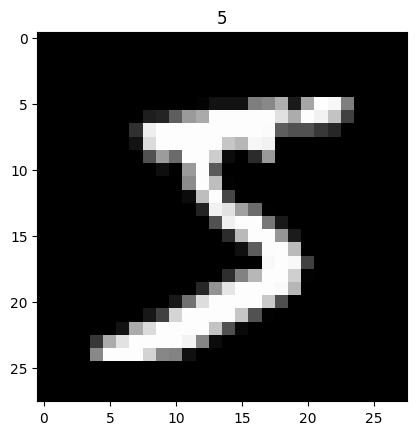

In [88]:
graficar_imagen(datos_entrenamiento, 0)

#### Inciso B

In [89]:
def cantidad_indices(datos):
    indices = []
    suma = 0
    for i in range(0, len(datos)):
        indices.append(int(datos[i][0]))
    
    for j in range(0, 10):
        print("Hay", indices.count(j), "imagenes del digito", j)
        suma = suma + indices.count(j)

    

In [90]:
cantidad_indices(datos_entrenamiento)

Hay 5923 imagenes del digito 0
Hay 6742 imagenes del digito 1
Hay 5958 imagenes del digito 2
Hay 6131 imagenes del digito 3
Hay 5842 imagenes del digito 4
Hay 5421 imagenes del digito 5
Hay 5918 imagenes del digito 6
Hay 6265 imagenes del digito 7
Hay 5851 imagenes del digito 8
Hay 5949 imagenes del digito 9


In [91]:
cantidad_indices(datos_testeo)

Hay 980 imagenes del digito 0
Hay 1135 imagenes del digito 1
Hay 1032 imagenes del digito 2
Hay 1010 imagenes del digito 3
Hay 982 imagenes del digito 4
Hay 892 imagenes del digito 5
Hay 958 imagenes del digito 6
Hay 1028 imagenes del digito 7
Hay 974 imagenes del digito 8
Hay 1009 imagenes del digito 9


#### Inciso C

In [92]:
# def promedio_2000_imagenes(datos):
#     suma = np.zeros((28,28))

#     for i in range(0, 2000):
#        _, vector_sin_indice = remover_indice_vector(datos[i])
#        suma = suma + vector_a_matriz(vector_sin_indice)

#     promedio = suma / 2000

#     return promedio

def imagen_promedio_de_digito(datos, cantidad_imagenes, digito):
   
   imagen_promedio = np.zeros((28,28))

   cantidad_imagenes_contadas = 0

   for i in range(0, cantidad_imagenes):
      if datos[i][0] == digito:
         _ , vector_sin_indice = remover_indice_vector(datos[i])
         imagen_promedio = imagen_promedio + vector_a_matriz(vector_sin_indice)
         cantidad_imagenes_contadas += 1
   
   imagen_promedio = imagen_promedio / cantidad_imagenes_contadas
   
   return imagen_promedio

def imagenes_promedio_de_digitos(datos, cantidad_imagenes):

   imagenes_promedio = []

   for i in range(0, 10):
      imagenes_promedio.append( imagen_promedio_de_digito(datos, cantidad_imagenes, i) )

   return imagenes_promedio
   


Pregunta: una vez hecha la imagen promedio, al dividir por x los elementos de la matriz es posible tener numeros reales (no enteros como en un principio). Hay que redondearlos?

#### Inciso D

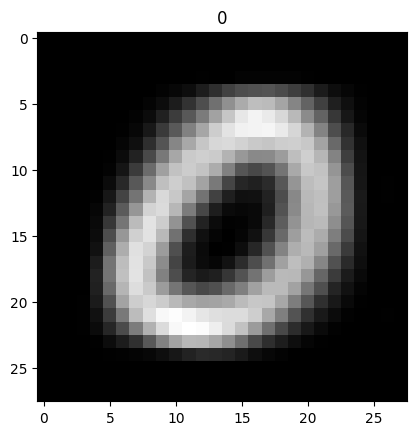

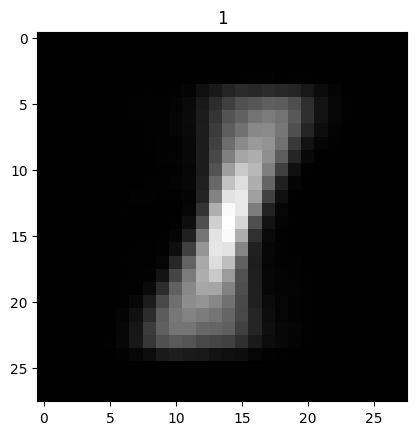

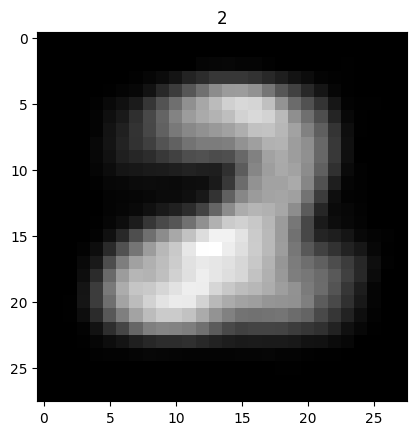

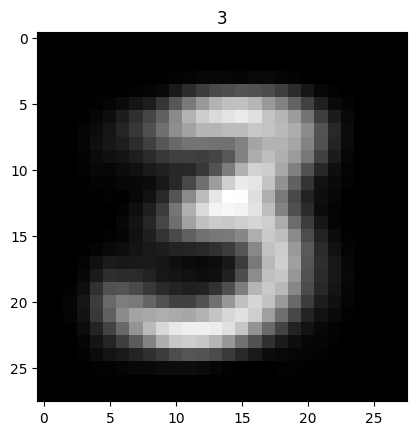

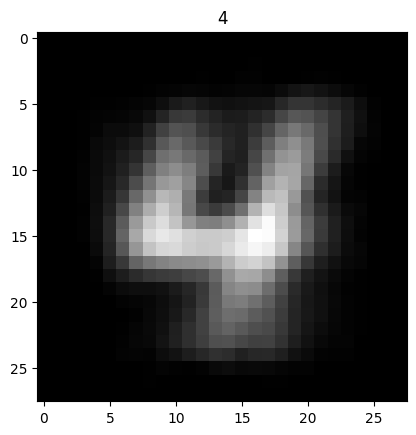

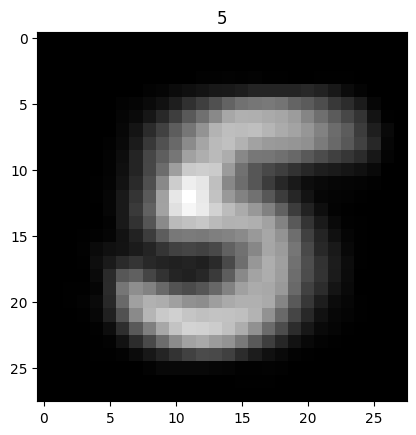

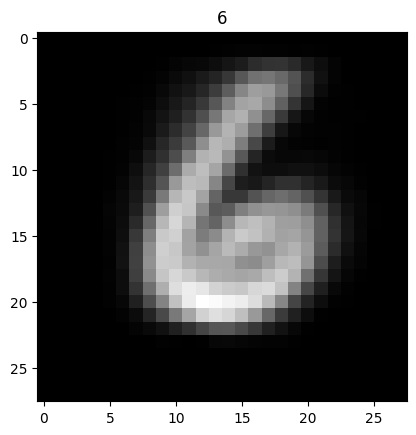

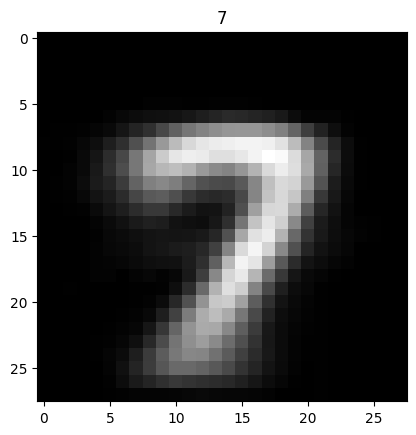

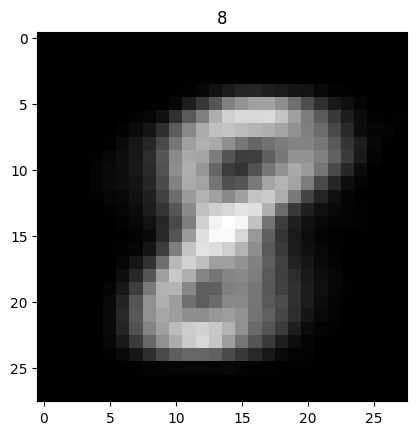

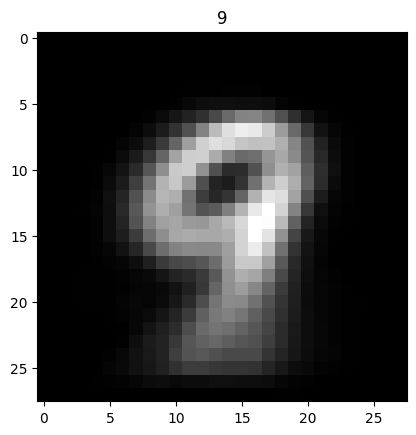

In [93]:
imagenes_promedio = imagenes_promedio_de_digitos(datos_entrenamiento, 2000)

for i in range(0, 10):
    grafico_matriz(imagenes_promedio[i], i)

### Ejercicio 2

#### Inciso A

In [94]:
imagenes_de_testeo = []
indices_imagenes_de_testeo = []

for i in range(0, 200):
    indice_del_vector, vector_sin_indice = remover_indice_vector( datos_testeo[i] )
    matriz = vector_a_matriz( vector_sin_indice )
    imagenes_de_testeo.append( matriz )
    indices_imagenes_de_testeo.append( indice_del_vector )

def predicciones(imagenes_promedio, imagenes_de_testeo):

    distancias = []
    distancia = 0
    predicciones = [] 


    for i in range(0, len(imagenes_de_testeo)):
        for j in range(0, 10): 
            distancia = np.linalg.norm( imagenes_promedio[j] - imagenes_de_testeo[i] )
            distancias.append( distancia )
        
        prediccion = distancias.index( min(distancias) )
        predicciones.append( prediccion )
        distancias.clear()

    return predicciones


In [95]:
predicciones = predicciones(imagenes_promedio, imagenes_de_testeo)

def precision_predicciones(imagenes_de_testeo, indices_imagenes_de_testeo, predicciones):

    precision = 0

    desaciertos = []
    
    for i in range(0,200):
        if indices_imagenes_de_testeo[i] == predicciones[i]:
            precision += 1
        else: 
            
            desaciertos.append( (imagenes_de_testeo[i], indices_imagenes_de_testeo[i] , predicciones[i]) )


    precision = precision / len(predicciones)

    return desaciertos, precision


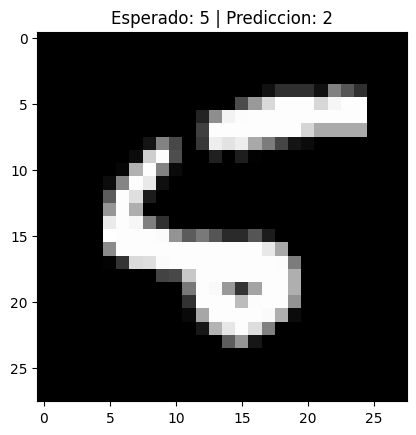

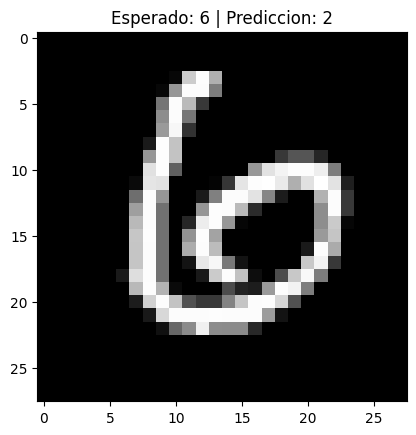

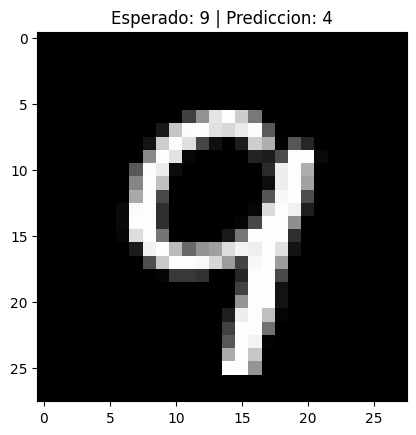

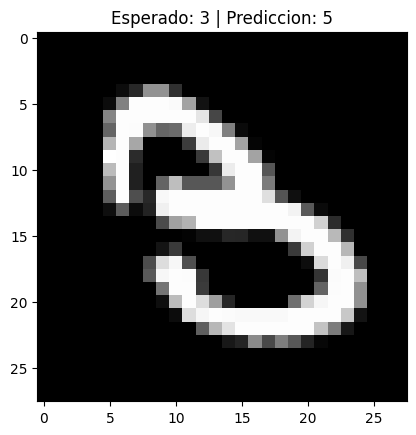

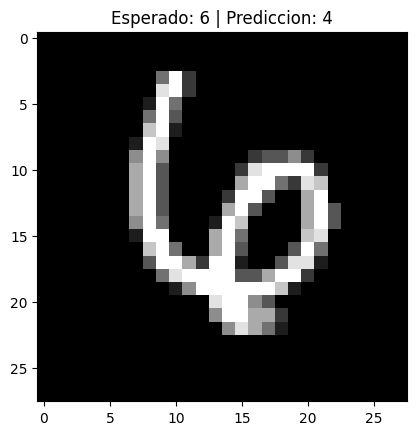

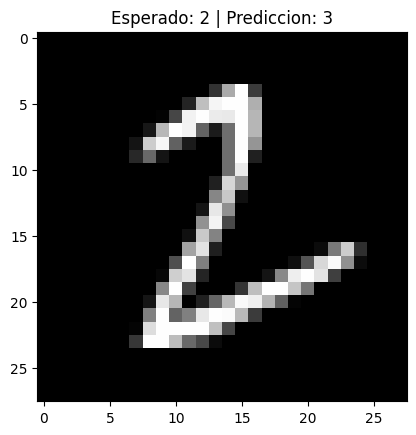

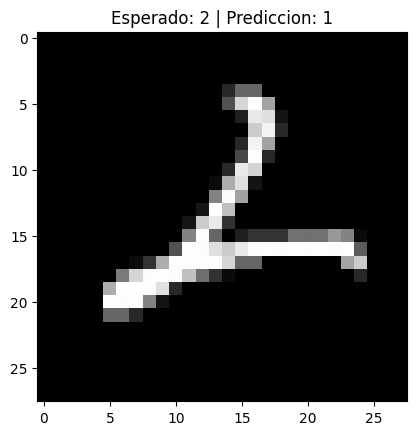

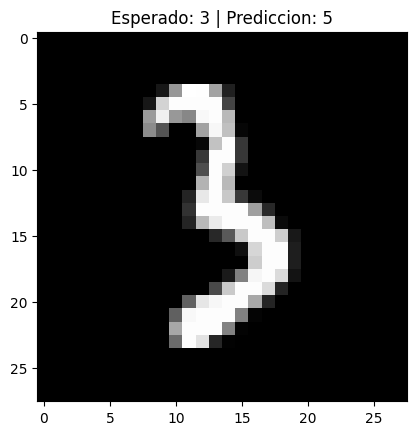

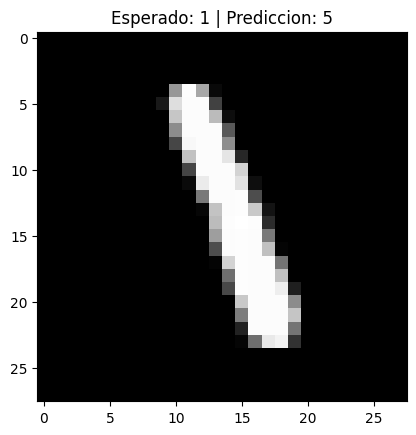

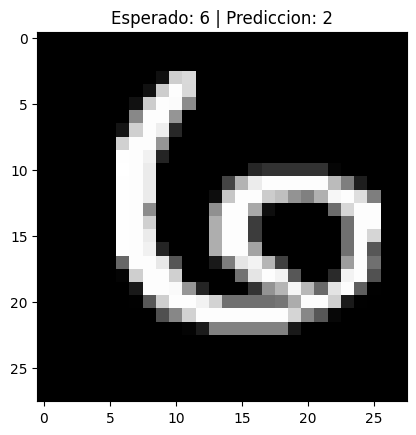

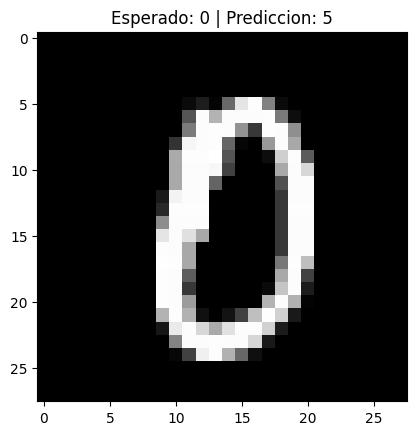

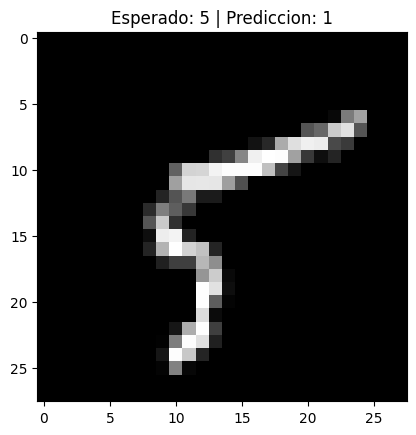

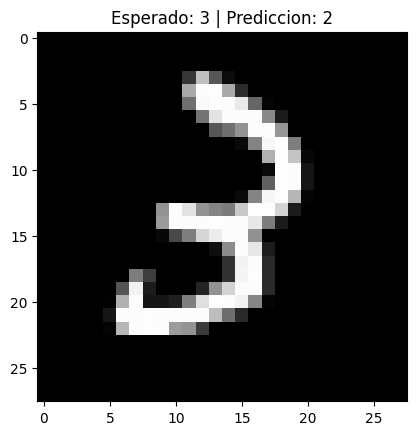

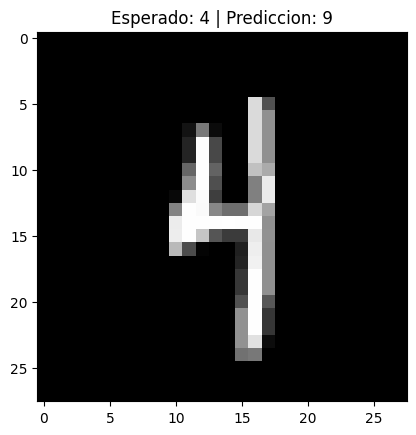

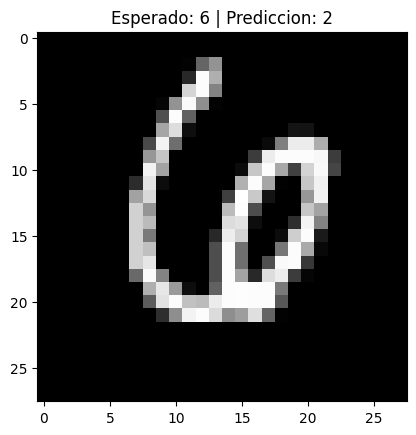

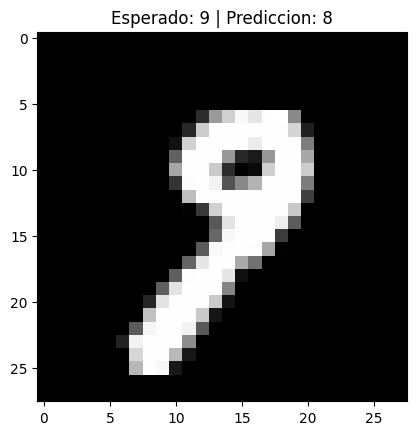

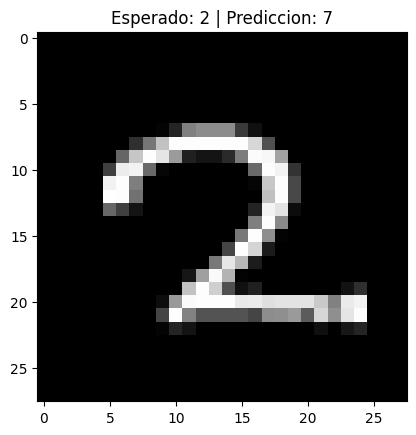

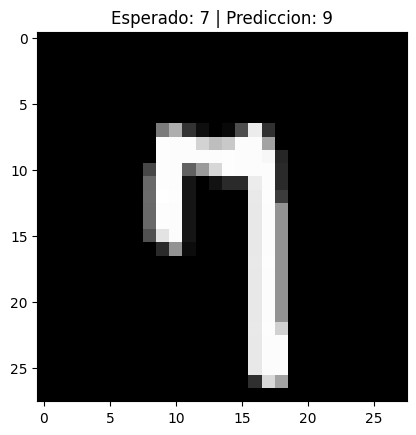

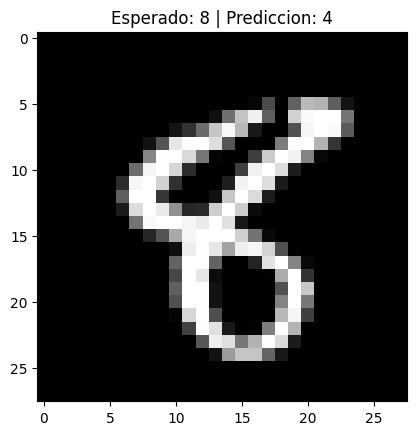

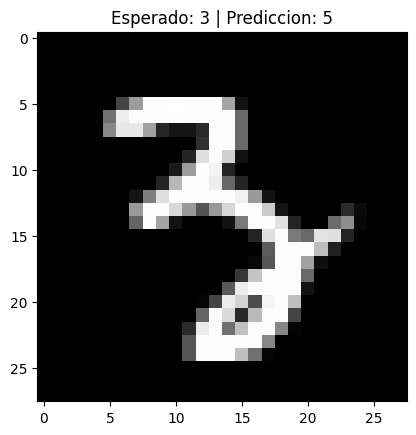

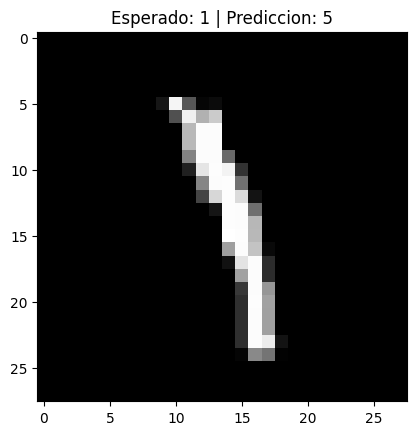

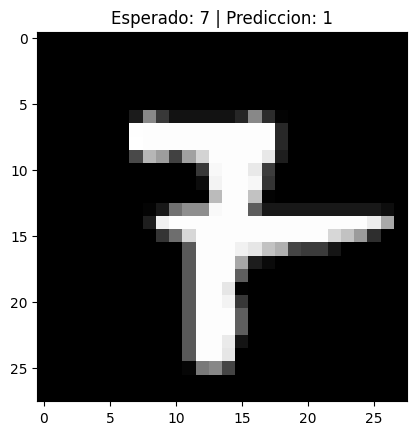

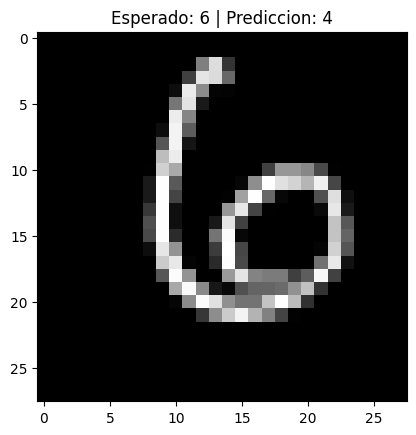

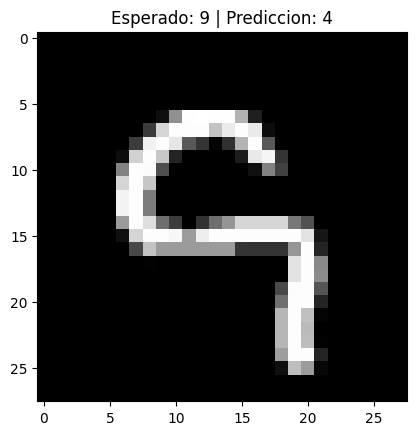

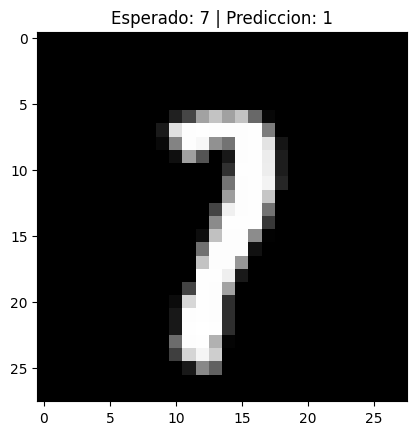

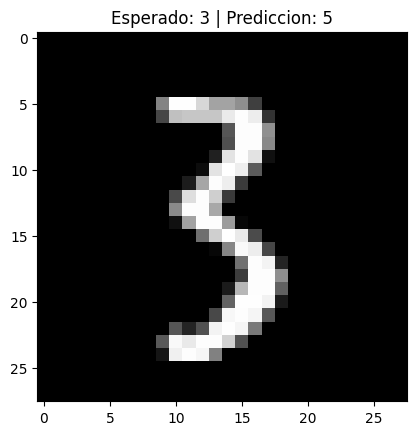

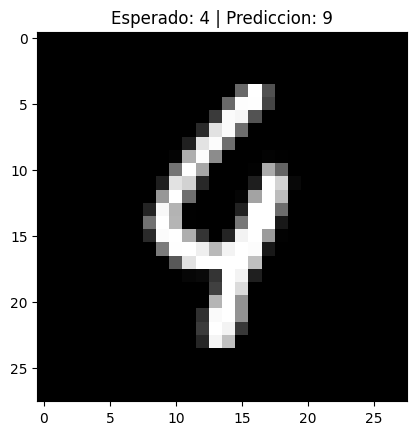

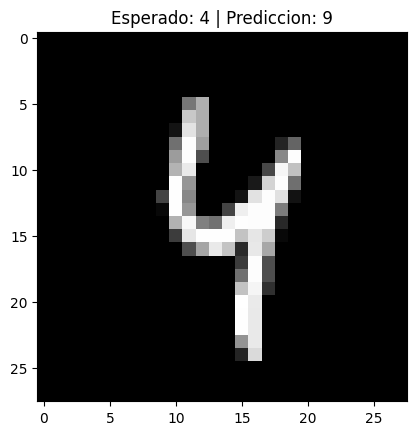

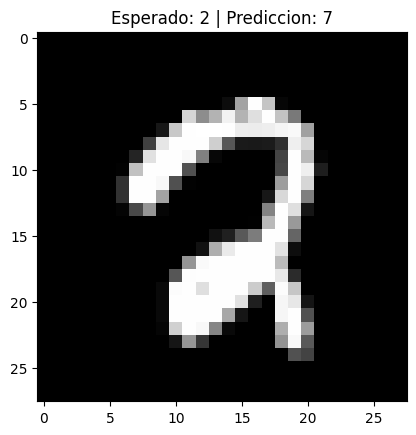

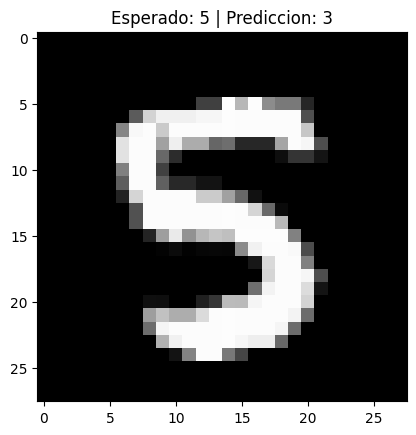

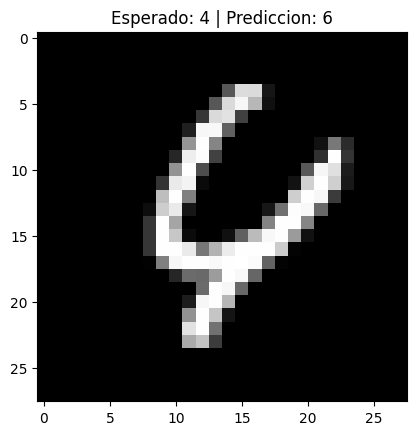

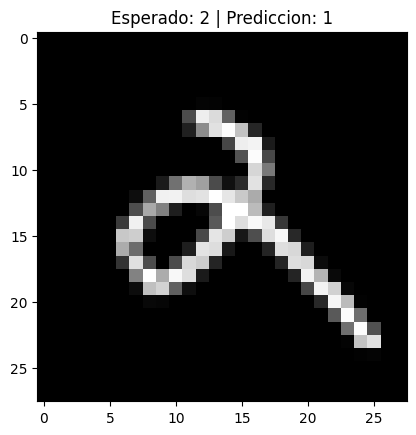

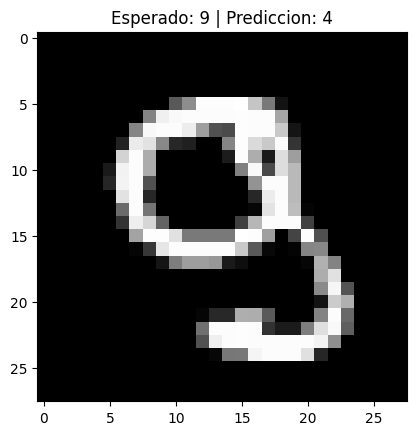

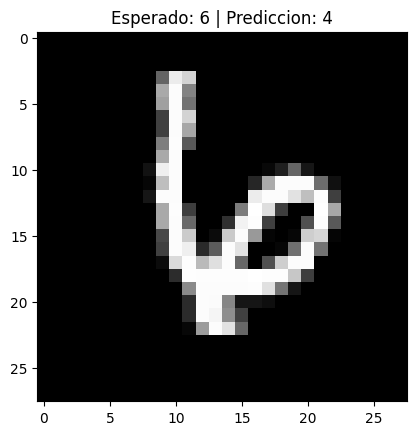

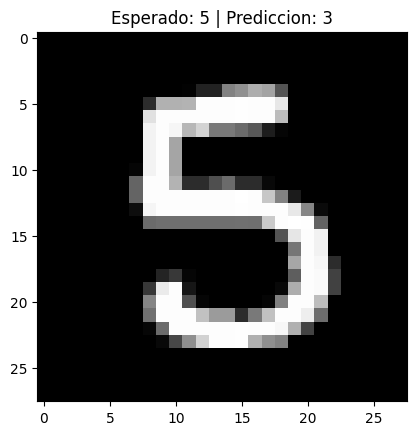

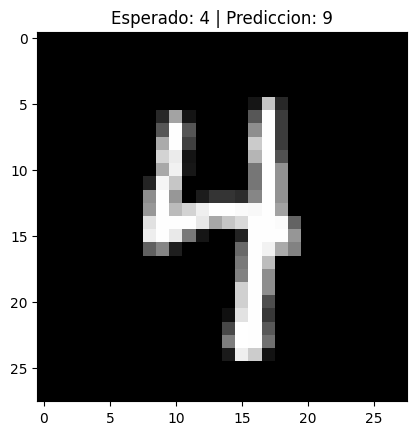

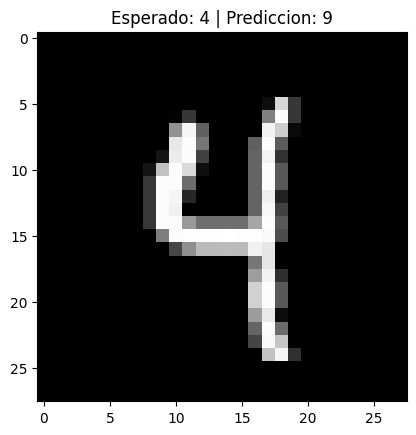

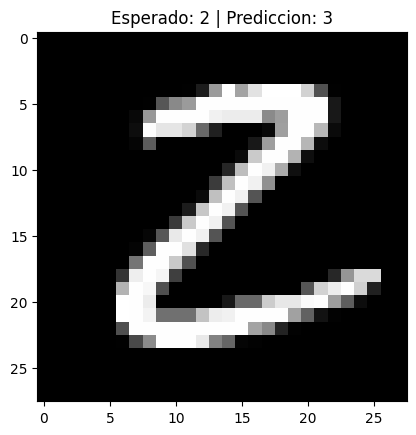

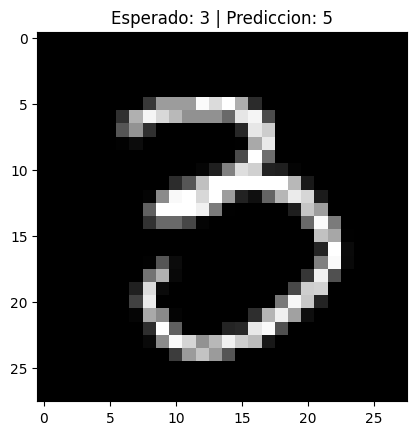

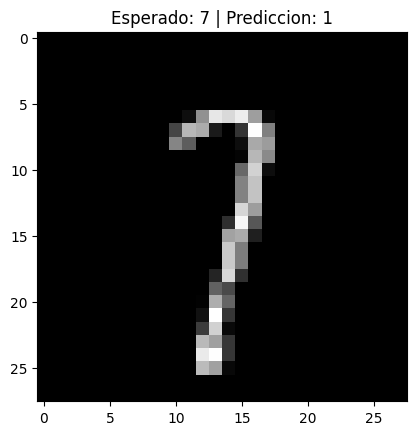

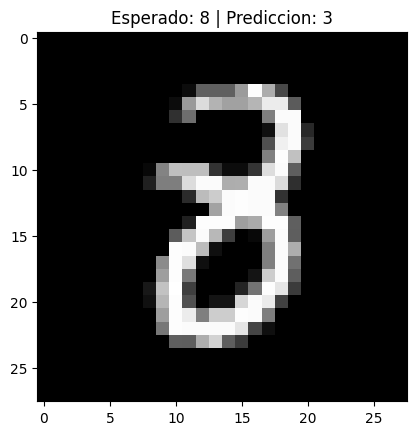

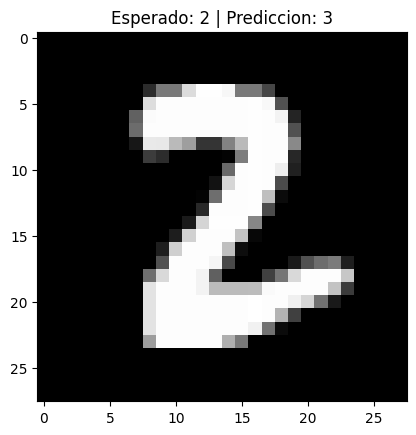

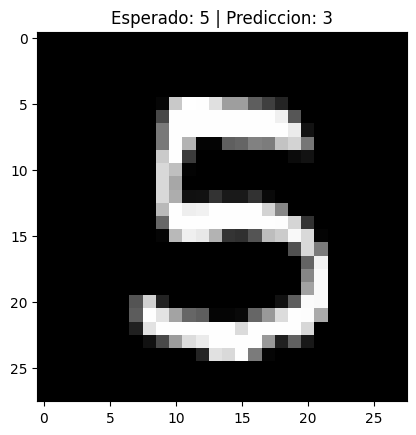

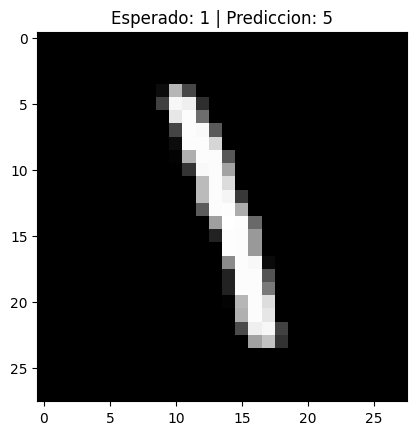

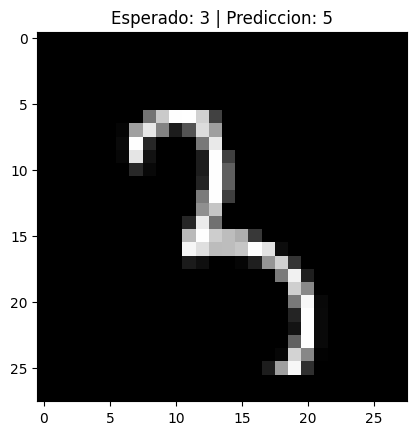

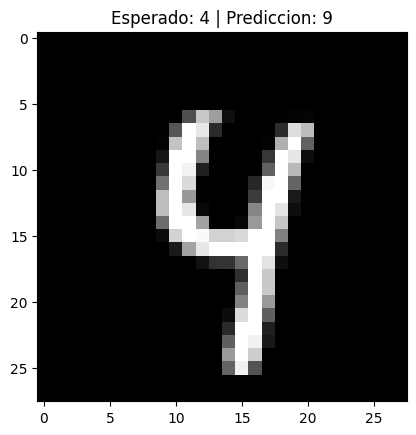

In [101]:
desaciertos, precision = precision_predicciones(imagenes_de_testeo, indices_imagenes_de_testeo, predicciones)
for i in range(0, len(desaciertos)):
    indice = desaciertos[i][1]
    prediccion = desaciertos[i][2]
    plt.title("Esperado: {} | Prediccion: {}".format(indice, prediccion))
    plt.imshow(desaciertos[i][0], cmap='gray')
    plt.show()
    